# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
from scipy.stats import pearsonr, linregress


#INSTALL CITYPY IN TERMINAL 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV) AND ALWAYS CONFIRM PATH (where is the file located)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#confirm link is working 
url='http://api.openweathermap.org/data/2.5/weather?'
units='metric'
query_url=f'{url}appid={weather_api_key}&units={units}&q='
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=6e2930f63dd462d1c4bae02c99568225&units=metric&q='

In [4]:
#confirming link and API works for one city 
city="busselton"
url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
response=requests.get(url).json()

lat=response['coord']['lat']
lon=response['coord']['lon']
max_temp=response['main']['temp_max']
humidity=response['main']['humidity']
cloudiness=response['clouds']['all']
wind_speed=response['wind']['speed']
country=response['sys']['country']
date=response['dt']

print(f"busselton latitude:{lat}\nbusselton longitude: {lon}")
print(f"busselton country: {country}")
print(f"busselton wind speed: {wind_speed}")
print(f"busselton date: {date}")
print(f"busselton max temp: {max_temp}")
print(f"busselton humidity: {humidity}")
print(f"busselton cloudiness: {cloudiness}")

busselton latitude:-33.65
busselton longitude: 115.33
busselton country: AU
busselton wind speed: 10.16
busselton date: 1594854789
busselton max temp: 288.15
busselton humidity: 95
busselton cloudiness: 31


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
i = 1
lat = []
lon = []
temp_max = []
humidity = []
description = []
speed  = []
country = []
dt = []
place = []
try:
    response = requests.get(query_url + cities[0]).json()
    lat.append(response["coord"]["lat"])
    lon.append(response["coord"]["lon"])
    temp_max.append(response["main"]["temp_max"])
    humidity.append(response["main"]["humidity"])
    description.append(response["weather"][0]["description"])
    speed.append(response["wind"]["speed"])
    country.append(response["sys"]["country"])
    dt.append(response["dt"])
    place.append(city)
    print(f"Process Record {i} of Set 1 | {city}")
    i +=1
except (KeyError, IndexError):
    print(f"City not found. Skipping...")
    pass

Process Record 1 of Set 1 | busselton


In [6]:
# set url for API
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url=f"{url}appid={weather_api_key}&units={units}&q="

#count start at number 1
i=1

# create empty list to hold response data for weather
city_name=[]
lat=[]
lon=[]
temp_max=[]
humidity=[]
weather=[]
wind_speed=[]
country=[]
date=[]



# print log statement 
print(f"Beginning Data Retreval")
print(f"----------------------------")

# loop through city and cities used try and except statement to obtain all cities
for city in cities: 
    
    try:
        response=requests.get(query_url+city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        weather.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
    
        print(f"Processing Record {i}|{city}")
        i += 1
    except (KeyError, IndexError):  
   
        print("City not found. Skipping...")
    pass

Beginning Data Retreval
----------------------------
Processing Record 1|kalmar
City not found. Skipping...
Processing Record 2|ushuaia
Processing Record 3|punta arenas
Processing Record 4|ibb
Processing Record 5|pacific grove
Processing Record 6|henties bay
Processing Record 7|bluff
City not found. Skipping...
City not found. Skipping...
Processing Record 8|naze
Processing Record 9|albany
Processing Record 10|mataura
Processing Record 11|atuona
Processing Record 12|busselton
Processing Record 13|xinzhi
Processing Record 14|osoyoos
Processing Record 15|hualmay
Processing Record 16|new norfolk
Processing Record 17|tuatapere
Processing Record 18|arraial do cabo
Processing Record 19|kavaratti
Processing Record 20|ambovombe
Processing Record 21|jamestown
Processing Record 22|cherskiy
City not found. Skipping...
Processing Record 23|lebu
Processing Record 24|khatanga
Processing Record 25|lillooet
Processing Record 26|saint george
City not found. Skipping...
Processing Record 27|rikitea
Proc

Processing Record 246|hamilton
Processing Record 247|spirovo
Processing Record 248|middlebury
Processing Record 249|port lincoln
Processing Record 250|sorgun
Processing Record 251|popova
Processing Record 252|soyo
Processing Record 253|manokwari
Processing Record 254|severo-kurilsk
Processing Record 255|muisne
Processing Record 256|chicama
Processing Record 257|atar
Processing Record 258|general cepeda
Processing Record 259|lopatino
Processing Record 260|tarko-sale
Processing Record 261|cayenne
Processing Record 262|mehamn
Processing Record 263|sitka
Processing Record 264|san jeronimo
Processing Record 265|korla
Processing Record 266|puliyankudi
Processing Record 267|olafsvik
Processing Record 268|fortuna
Processing Record 269|san patricio
Processing Record 270|mount gambier
City not found. Skipping...
Processing Record 271|bogashevo
Processing Record 272|longyearbyen
Processing Record 273|alexandria
Processing Record 274|iqaluit
Processing Record 275|pangkalanbuun
City not found. Skip

Processing Record 487|sola
Processing Record 488|krosno
Processing Record 489|turan
Processing Record 490|udachnyy
Processing Record 491|maragogi
Processing Record 492|zhigansk
Processing Record 493|saint-joseph
Processing Record 494|souillac
Processing Record 495|matay
Processing Record 496|kurilsk
Processing Record 497|gambela
Processing Record 498|tsiroanomandidy
City not found. Skipping...
City not found. Skipping...
Processing Record 499|hoquiam
Processing Record 500|saint-denis
Processing Record 501|ranong
Processing Record 502|eunice
Processing Record 503|ialibu
Processing Record 504|antigonish
Processing Record 505|jiujiang
Processing Record 506|port-gentil
Processing Record 507|dubovskoye
Processing Record 508|buchanan
Processing Record 509|evensk
Processing Record 510|mercedes
Processing Record 511|homer
Processing Record 512|twentynine palms
Processing Record 513|sakakah
Processing Record 514|riohacha
Processing Record 515|leona vicario
Processing Record 516|hofn
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#confirmed len of all lists to aviod any conflicts and issues and double checking it works 
print(len(city_name))
print(len(lat))
print(len(lon))
print(len(temp_max))
print(len(humidity))
print(len(weather))
print(len(wind_speed))
print(len(country))
print(len(date))

565
565
565
565
565
565
565
565
565


In [8]:
#created dictionary to hold values 
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": weather,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
#created data frame and exported into CSV 
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kalmar,56.66,16.36,62.01,100,84,6.93,SE,1594854789
1,ushuaia,-54.80,-68.30,28.40,86,1,5.82,AR,1594854790
2,punta arenas,-53.15,-70.92,33.80,86,75,5.82,CL,1594854126
3,ibb,13.97,44.18,70.18,63,100,0.76,YE,1594854790
4,pacific grove,36.62,-121.92,73.00,60,1,12.75,US,1594854214


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
humid_hundred = weather_data.loc[weather_data["Humidity"]>100]

#did for loop to confirm >100 for humidity 
for value in humidity:
    if value > 100:
        print(f"value :{value}")
    
hundred = weather_data.loc[weather_data["Humidity"]>99]
humid_under = weather_data.loc[weather_data["Humidity"]<100]
# checking to see if any cities that have humidity > 100%
print(len(humid_hundred))
print(len(humid_under))
print(len(hundred))

0
549
16


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

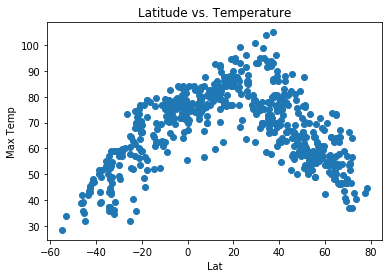

In [12]:
#correlation = round(pearsonr(weather_data['Lat'], weather_data['Max Temp'])[0],2)
#model=linregress(weather_data['Lat'], weather_data['Max Temp'])
#yvalues = weather_data['Lat']*model[0]+model[1]
plt.scatter(weather_data['Lat'],weather_data['Max Temp'])
#plt.plot(weather_data['Lat'],yvalues,color="pink")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Temperature')
plt.show()

## Latitude vs. Humidity Plot

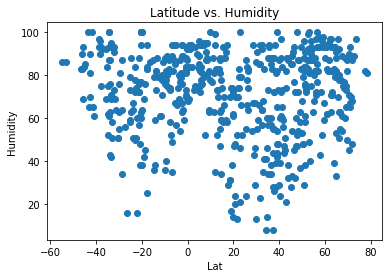

In [13]:
plt.scatter(weather_data['Lat'],weather_data['Humidity'])
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

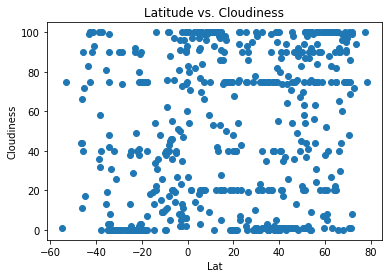

In [14]:
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'])
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

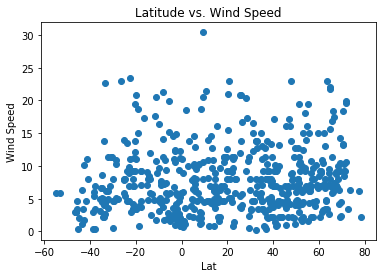

In [15]:
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'])
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.show()

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = weather_data.loc[weather_data["Lat"]>=0]
southern_hemi = weather_data.loc[weather_data["Lat"]<=0]
northern_hemi

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kalmar,56.66,16.36,62.01,100,84,6.93,SE,1594854789
3,ibb,13.97,44.18,70.18,63,100,0.76,YE,1594854790
4,pacific grove,36.62,-121.92,73.00,60,1,12.75,US,1594854214
7,naze,28.37,129.48,80.60,94,75,9.17,JP,1594854791
8,albany,42.60,-73.97,86.00,51,37,2.24,US,1594854645
...,...,...,...,...,...,...,...,...,...
558,bemidji,47.47,-94.88,78.80,47,1,16.11,US,1594854728
559,prince albert,53.20,-105.77,69.80,49,75,14.99,CA,1594854888
561,great yarmouth,52.61,1.73,59.00,99,100,9.93,GB,1594854902
562,khuzhir,53.19,107.34,57.60,81,100,12.41,RU,1594854903


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

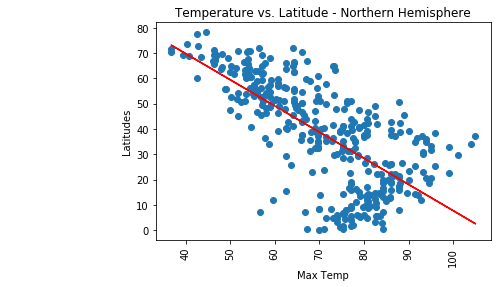

In [17]:
x_values = northern_hemi["Max Temp"]
y_values = northern_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="pink")
plt.xlabel("Max Temp")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Temperature vs. Latitude - Northern Hemisphere")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

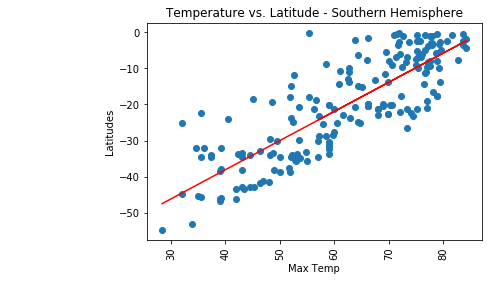

In [18]:
x_values = southern_hemi["Max Temp"]
y_values = southern_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="pink")
plt.xlabel("Max Temp")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Temperature vs. Latitude - Southern Hemisphere")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

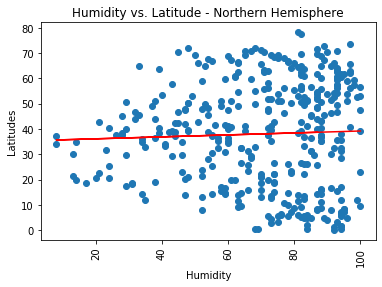

In [19]:
x_values = northern_hemi["Humidity"]
y_values = northern_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,74),fontsize=15,color="pink")
plt.xlabel("Humidity")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Humidity vs. Latitude - Northern Hemisphere")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

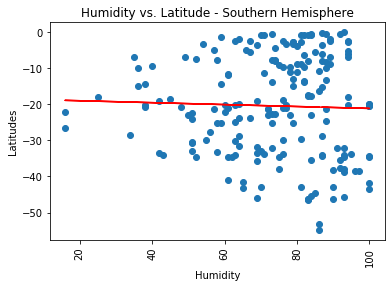

In [20]:
x_values = southern_hemi["Humidity"]
y_values = southern_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-2),fontsize=15,color="pink")
plt.xlabel("Humidity")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Humidity vs. Latitude - Southern Hemisphere")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

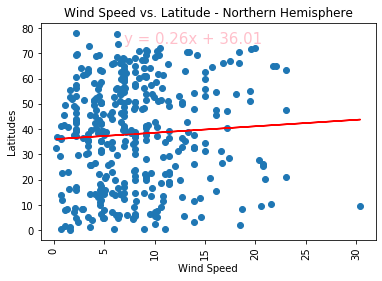

In [21]:
x_values = northern_hemi["Wind Speed"]
y_values = northern_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,74),fontsize=15,color="pink")
plt.xlabel("Wind Speed")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Wind Speed vs. Latitude - Northern Hemisphere")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

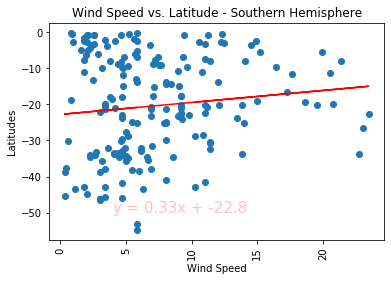

In [22]:
x_values = southern_hemi["Wind Speed"]
y_values = southern_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,-50),fontsize=15,color="pink")
plt.xlabel("Wind Speed")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Wind Speed vs. Latitude - Southern Hemisphere")
plt.show()